<a href="https://colab.research.google.com/github/sinheechan/ML/blob/main/240110_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/titanic_train.csv')
df.head()
len(df)

In [ ]:
df.info()

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True) # 평균치로 결측치 채움
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)
print('데이터셋 null 개수:', df.isnull().sum().sum())

In [ ]:
print('성별 값 분포:', df['Sex'].value_counts())
print('-' * 50)
print('Cabin 값 분포:', df['Cabin'].value_counts())
print('-' * 50)
print('Embarked 값 분포:', df['Embarked'].value_counts())

In [ ]:
df['Cabin'] = df['Cabin'].str[:1] # 앞글자만
print(df['Cabin'].head())

In [ ]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df) # 좌석별/성별 생존률

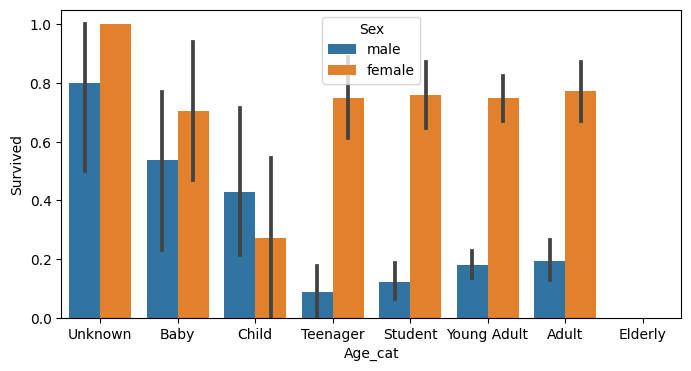

In [ ]:
# 자주 쓰는 거는 함수화 해야 합니다.
def get_category(age) :
  cat = ''
  if age <= 1: cat = 'Unknown'
  elif age <=5: cat = 'Baby'
  elif age <=12: cat = 'Child'
  elif age <=18: cat = 'Teenager'
  elif age <=25: cat = 'Student'
  elif age <=35: cat = 'Young Adult'
  elif age <=60: cat = 'Adult'
  else : age = 'Elderly'
  return cat

plt.figure(figsize=(8,4))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df, order=group_names)
df.drop('Age_cat', axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return dataDF

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True) # 평균치로 결측치 채움
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  print('데이터셋 null 개수:', df.isnull().sum().sum())
  return df

def drop_features(df):
  df.drop(['Name', 'Ticket'], axis=1, inplace=True) # 승객아이디보류
  return df

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [ ]:
df = pd.read_csv('/content/titanic_train.csv')
y_df = df['Survived']
X_df = df.drop('Survived', axis=1)
X_df = transform_features(X_df)

데이터셋 null 개수: 0


In [ ]:
X_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,7,3
1,2,1,0,38.0,1,0,71.2833,2,0
2,3,3,0,26.0,0,0,7.9250,7,3
3,4,1,0,35.0,1,0,53.1000,2,3
4,5,3,1,35.0,0,0,8.0500,7,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=2024)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

712 712
179 179


In [ ]:
y_train.head()

618    1
434    0
803    1
218    1
509    1
Name: Survived, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=2024)
rf_clf = RandomForestClassifier(random_state=2024)
lr_clf = LogisticRegression(solver='liblinear')

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DT 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RF 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LR 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DT 정확도: 0.7654
RF 정확도: 0.8492
LR 정확도: 0.8101


In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores = []
  for i, (train_index, test_index) in enumerate(kfold.split(X_df)):
    X_train, X_test = X_df.values[train_index], X_df.values[test_index]
    y_train, y_test = y_df.values[train_index], y_df.values[test_index]

    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    scores.append(accuracy)
    print('교차 검증{0} 정확도:{1:4f}'.format(i, accuracy))

  mean_score = np.mean(scores)
  print('평균정확도:{0:4f}'.format(mean_score))
# 함수 호출
exec_kfold(dt_clf, folds=5)

교차 검증0 정확도:0.720670
교차 검증1 정확도:0.808989
교차 검증2 정확도:0.808989
교차 검증3 정확도:0.741573
교차 검증4 정확도:0.393258
평균정확도:0.694696


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

cv = KFold(n_splits=5, random_state=2024, shuffle=True) # shuffle 랜덤하게 데이터셋을 섞음
accs = cross_val_score(dt_clf, X_df, y_df, cv=cv) # model, X, y, cv
print(accs)
print('평균정확도:', np.mean(accs))

[0.76536313 0.75280899 0.8258427  0.73033708 0.75280899]
평균정확도: 0.7654321762601217


In [ ]:
from sklearn.model_selection import GridSearchCV # 최적 하이퍼파라미터를 찾는 알고리즘

parameters = {'max_depth':[2,3,5,10], # 높을수록 모델이 복잡해지고 과적합 우려 존재
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]} # 높이면 덜 분할 일반화, 높이면 더 작은 리프노드, 간단해짐

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5) # n_jobs=-1(모든 cpu 사용), verbose=2(로그출력)
grid_dclf.fit(X_train, y_train)

print('GS 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GS 최고 정확도:{0:4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpred)
print('테스트셋 DR 정확도(GS를 한것):{0: 4f}'.format(accuracy))

GS 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
GS 최고 정확도:0.804777
테스트셋 DR 정확도(GS를 한것): 0.776536


In [ ]:
test_data = pd.read_csv('/content/titanic_test.csv')
#y_test = df['Survived']
#X_test = df.drop('Survived', axis=1)
X_test = transform_features(test_data)

데이터셋 null 개수: 1


In [ ]:
len(X_test)

418

In [ ]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,7,1
1,893,3,0,47.0,1,0,7.0000,7,2
2,894,2,1,62.0,0,0,9.6875,7,1
3,895,3,1,27.0,0,0,8.6625,7,2
4,896,3,0,22.0,1,1,12.2875,7,2


In [ ]:
mean_fare = X_test['Fare'].mean()
X_test['Fare'].fillna(mean_fare, inplace=True)

In [ ]:
test_prediction = best_dclf.predict(X_test)

In [ ]:
len(test_prediction)

418

In [ ]:
submission_df = pd.DataFrame({'PassengerId': X_test['PassengerId'], 'Survived': test_prediction})
submission_df.to_csv('submission.csv', index=False)